<a href="https://colab.research.google.com/github/inesdarosa/Series_temporales/blob/main/ancap_c7_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from matplotlib import pyplot

In [15]:
from google.colab import files
 
files.upload()

Saving indep_dep.csv to indep_dep (1).csv


{'indep_dep.csv': b'Fecha,TimeStamp,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,tdc_phd.li_21018,tdc_phd.lic_21022,tdc_phd.fic_21018,tdc_phd.fic_24002,tdc_phd.fi_21019,tdc_phd.fic_22001,tdc_phd.fi_21020,Unnamed: 0,Contenido_C7_Total\r\n2017-11-13,2017-11-13,0.8192951180555555,0.8263641805555556,0.8472210069444445,100.93220697916666,73.50956148611111,42.189784715277774,148.22253818055557,134.299978,134.2982687986111,143.10545379166666,66.64797763888889,70.05251014583334,34.85339067361111,20.17070617361111,3.434801625,40.00115363888889,9.294360159722222,338,1.58\r\n2017-11-14,2017-11-14,0.8011703680555555,0.8127615277777778,0.8257015902777778,87.20688796527777,73.73051727083333,37.37120351388889,152.31909804166665,134.66337122916667,134.66352140277775,145.05345842361112,67.34714694444445,70.24097903472223,29.4382789375,3.6354548958333335,10.521893791666669,28.1

In [16]:
import pandas as pd

In [17]:
dataset = pd.read_csv('indep_dep.csv', header=0, index_col=0)

In [18]:
dataset.head()

,TimeStamp,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,tdc_phd.li_21018,tdc_phd.lic_21022,tdc_phd.fic_21018,tdc_phd.fic_24002,tdc_phd.fi_21019,tdc_phd.fic_22001,tdc_phd.fi_21020,Unnamed: 0,Contenido_C7_Total
Fecha,,,,,,,,,,,,,,,,,,,,
2017-11-13,2017-11-13,0.819295,0.826364,0.847221,100.932207,73.509561,42.189785,148.222538,134.299978,134.298269,143.105454,66.647978,70.052510,34.853391,20.170706,3.434802,40.001154,9.294360,338,1.58
2017-11-14,2017-11-14,0.801170,0.812762,0.825702,87.206888,73.730517,37.371204,152.319098,134.663371,134.663521,145.053458,67.347147,70.240979,29.438279,3.635455,10.521894,28.176103,8.376362,339,0.87
2017-11-16,2017-11-16,0.826219,0.838026,0.854918,104.310466,76.664024,33.994632,151.200238,134.382160,134.381825,147.355394,65.485162,74.979803,38.995666,16.691236,0.561110,40.000251,8.054052,340,1.29
2017-11-17,2017-11-17,0.833356,0.840347,0.860223,103.906107,79.025281,35.451903,149.734197,134.969764,134.970762,146.560959,75.282022,75.058140,39.863375,19.800107,1.078201,40.001630,4.365032,341,1.9
2017-11-19,2017-11-19,0.794647,0.835320,0.824547,98.335235,76.613032,32.870264,149.690790,134.991420,134.989959,146.505432,68.290068,74.845552,44.011026,22.179107,1.087623,39.999506,1.545024,342,0.68


In [19]:
dataset = dataset.drop(['TimeStamp', 'Unnamed: 0'], axis=1)

In [20]:
dataset.head()

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,tdc_phd.li_21018,tdc_phd.lic_21022,tdc_phd.fic_21018,tdc_phd.fic_24002,tdc_phd.fi_21019,tdc_phd.fic_22001,tdc_phd.fi_21020,Contenido_C7_Total
Fecha,,,,,,,,,,,,,,,,,,
2017-11-13,0.819295,0.826364,0.847221,100.932207,73.509561,42.189785,148.222538,134.299978,134.298269,143.105454,66.647978,70.052510,34.853391,20.170706,3.434802,40.001154,9.294360,1.58
2017-11-14,0.801170,0.812762,0.825702,87.206888,73.730517,37.371204,152.319098,134.663371,134.663521,145.053458,67.347147,70.240979,29.438279,3.635455,10.521894,28.176103,8.376362,0.87
2017-11-16,0.826219,0.838026,0.854918,104.310466,76.664024,33.994632,151.200238,134.382160,134.381825,147.355394,65.485162,74.979803,38.995666,16.691236,0.561110,40.000251,8.054052,1.29
2017-11-17,0.833356,0.840347,0.860223,103.906107,79.025281,35.451903,149.734197,134.969764,134.970762,146.560959,75.282022,75.058140,39.863375,19.800107,1.078201,40.001630,4.365032,1.9
2017-11-19,0.794647,0.835320,0.824547,98.335235,76.613032,32.870264,149.690790,134.991420,134.989959,146.505432,68.290068,74.845552,44.011026,22.179107,1.087623,39.999506,1.545024,0.68


In [21]:
dataset.dtypes

tdc_phd.pi_21030      float64
tdc_phd.pic_21034     float64
tdc_phd.pi_21035      float64
tdc_phd.ti_21046      float64
tdc_phd.tic_21047     float64
tdc_phd.ti_21048      float64
tdc_phd.ti_21050      float64
tdc_phd.ti_21049      float64
tdc_phd.tic_21051     float64
tdc_phd.ti_21052      float64
tdc_phd.li_21018      float64
tdc_phd.lic_21022     float64
tdc_phd.fic_21018     float64
tdc_phd.fic_24002     float64
tdc_phd.fi_21019      float64
tdc_phd.fic_22001     float64
tdc_phd.fi_21020      float64
Contenido_C7_Total     object
dtype: object

In [22]:
# Esto es para cambiar el tipo de dato de la variable Contenido_C7_Total

import re

dataset.Contenido_C7_Total = dataset.Contenido_C7_Total.map(lambda x: int(re.search(r"\d+", x).group(0)))

In [23]:
dataset.dtypes

tdc_phd.pi_21030      float64
tdc_phd.pic_21034     float64
tdc_phd.pi_21035      float64
tdc_phd.ti_21046      float64
tdc_phd.tic_21047     float64
tdc_phd.ti_21048      float64
tdc_phd.ti_21050      float64
tdc_phd.ti_21049      float64
tdc_phd.tic_21051     float64
tdc_phd.ti_21052      float64
tdc_phd.li_21018      float64
tdc_phd.lic_21022     float64
tdc_phd.fic_21018     float64
tdc_phd.fic_24002     float64
tdc_phd.fi_21019      float64
tdc_phd.fic_22001     float64
tdc_phd.fi_21020      float64
Contenido_C7_Total      int64
dtype: object

In [24]:
# Este código lo adapté de: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.705909   0.873771   0.656339   0.897903   0.068852   0.496836   
2   0.672689   0.838587   0.622114   0.649425   0.085246   0.369972   
3   0.718600   0.903933   0.668580   0.959062   0.697268   0.281073   
4   0.731682   0.909938   0.677018   0.951741   0.977049   0.319440   
5   0.660731   0.896935   0.620278   0.850888   0.683060   0.251470   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.885453   0.971725   0.971691    0.874534    0.681621    0.340487   
2   0.951312   0.977935   0.977933    0.904239    0.699671    0.352700   
3   0.933325   0.973129   0.973119    0.939340    0.651601    0.659752   
4   0.909756   0.983170   0.983184    0.927226    0.904522    0.664828   
5   0.909058   0.983540   0.983512    0.926380    0.724014    0.651053   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  var18(t-1)  \
1    0.141333    0.510679    0.149170    0.546220  

In [25]:
values = reframed.values
values

array([[0.70590913, 0.8737706 , 0.6563387 , ..., 0.27622145, 0.07692308,
        0.        ],
       [0.6726887 , 0.8385869 , 0.6221142 , ..., 0.24893923, 0.        ,
        0.07692308],
       [0.7186003 , 0.90393317, 0.6685802 , ..., 0.23936039, 0.07692308,
        0.07692308],
       ...,
       [0.59654486, 0.83258045, 0.76954675, ..., 0.        , 0.07692308,
        0.07692308],
       [0.70075274, 0.8788084 , 0.87982285, ..., 0.        , 0.07692308,
        0.        ],
       [0.6338103 , 0.8829249 , 0.82711065, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [26]:
#n_train_hours = 365 * 24
train = values[:400, :]
test = values[400:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(400, 1, 18) (400,) (539, 1, 18) (539,)


In [27]:
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/50
6/6 - 5s - loss: 0.0596 - val_loss: 0.0634 - 5s/epoch - 761ms/step
Epoch 2/50
6/6 - 0s - loss: 0.0445 - val_loss: 0.0588 - 49ms/epoch - 8ms/step
Epoch 3/50
6/6 - 0s - loss: 0.0442 - val_loss: 0.0587 - 50ms/epoch - 8ms/step
Epoch 4/50
6/6 - 0s - loss: 0.0433 - val_loss: 0.0586 - 51ms/epoch - 8ms/step
Epoch 5/50
6/6 - 0s - loss: 0.0435 - val_loss: 0.0583 - 60ms/epoch - 10ms/step
Epoch 6/50
6/6 - 0s - loss: 0.0432 - val_loss: 0.0588 - 53ms/epoch - 9ms/step
Epoch 7/50
6/6 - 0s - loss: 0.0429 - val_loss: 0.0581 - 47ms/epoch - 8ms/step
Epoch 8/50
6/6 - 0s - loss: 0.0426 - val_loss: 0.0581 - 52ms/epoch - 9ms/step
Epoch 9/50
6/6 - 0s - loss: 0.0425 - val_loss: 0.0580 - 55ms/epoch - 9ms/step
Epoch 10/50
6/6 - 0s - loss: 0.0423 - val_loss: 0.0580 - 52ms/epoch - 9ms/step
Epoch 11/50
6/6 - 0s - loss: 0.0422 - val_loss: 0.0579 - 48ms/epoch - 8ms/step
Epoch 12/50
6/6 - 0s - loss: 0.0421 - val_loss: 0.0578 - 56ms/epoch - 9ms/step
Epoch 13/50
6/6 - 0s - loss: 0.0419 - val_loss: 0.0579 - 48m

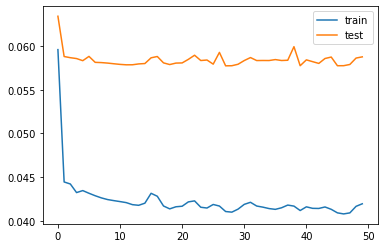

In [28]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

17/17 [==============================] - 1s 2ms/step
Test RMSE: 0.056
